# Analyse statistique

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/data_cleaned.csv")
data.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,119,Adventure,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,Furious 7,137,Action,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


### Étude univariée

Variables qualitatives

genres
Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: count, dtype: int64


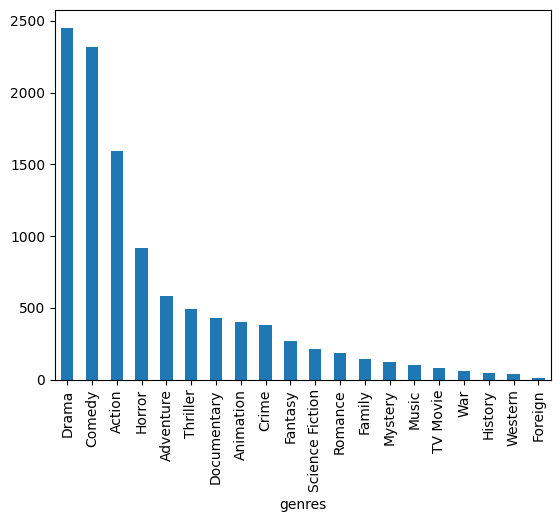

In [74]:
# Ici seul le genre peut être étudié
table = data["genres"].value_counts()
print(table)
table.plot(kind="bar")
plt.show()

On retient ici les genres avec le plus de films au compteur dans notre échantillon.

Variables quantitatives

Variable ```vote_average```

Moyenne:  5.974063825862387
Écart-type:  0.9342565128430916
Médiane:  6.0


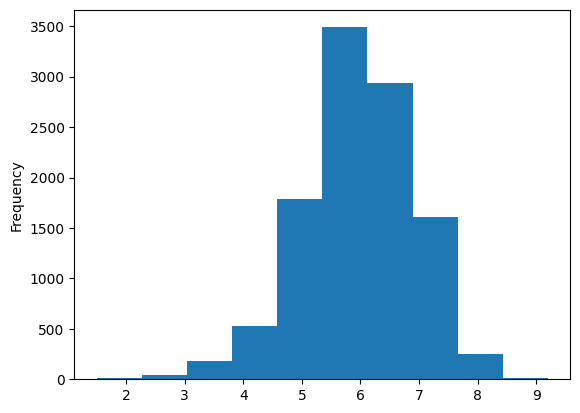

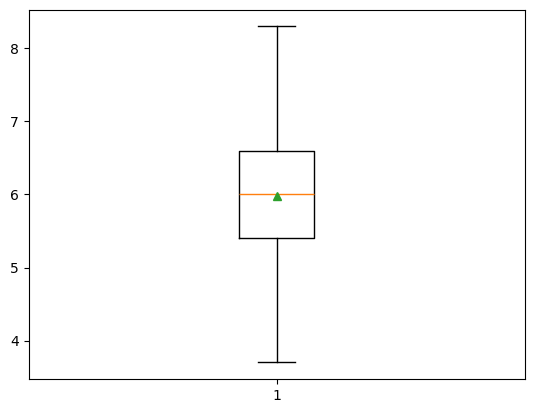

In [75]:
print("Moyenne: ", data["vote_average"].mean())
print("Écart-type: ", data["vote_average"].std())
print("Médiane: ", data["vote_average"].median())
data["vote_average"].plot(kind="hist")
plt.show()
plt.boxplot(data["vote_average"], showmeans=True, showfliers=False)
plt.show()

La répartition de notre échantillon pour cette variable est centré en "6". On pourrait calculer son skewness pour étudier sa symétrie

In [76]:
print("Skewness: ", data["vote_average"].skew(), "\nSa valeur étant négative la distribution n'est donc pas symétrique mais plutôt étalée vers la gauche")


Skewness:  -0.43754305371007274 
Sa valeur étant négative la distribution n'est donc pas symétrique mais plutôt étalée vers la gauche


Moyenne:  102.1384430916805
Écart-type:  31.294612206446445
Médiane:  99.0


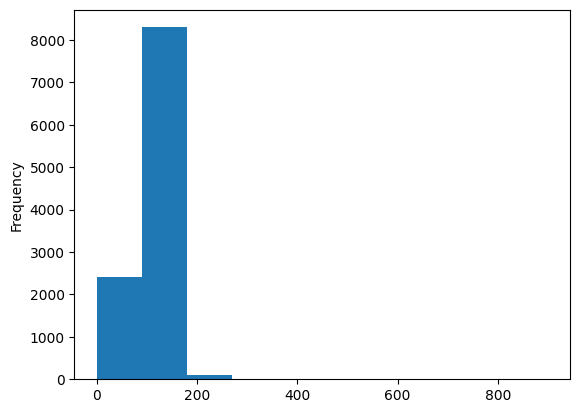

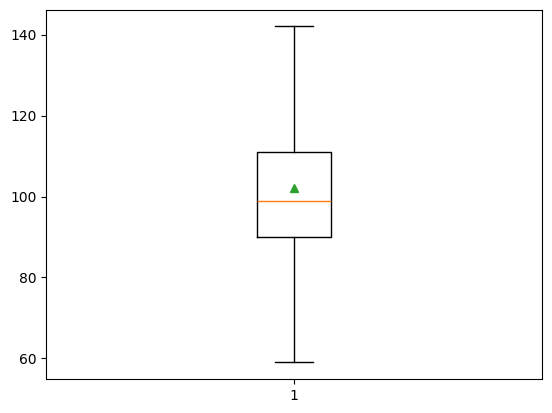

In [77]:
print("Moyenne: ", data["runtime"].mean())
print("Écart-type: ", data["runtime"].std())
print("Médiane: ", data["runtime"].median())
data["runtime"].plot(kind="hist")
plt.show()
plt.boxplot(data["runtime"], showmeans=True, showfliers=False)
plt.show()

Ici, on remarque que la plupart des films ont une durée de 1 heure et 30 minutes et leur durée minimale tourne autour d'une heure.

**************************************************
Variable:  vote_count
Moyenne:  217.82364877328905
Écart-type:  576.1809932010563
Médiane:  38.0


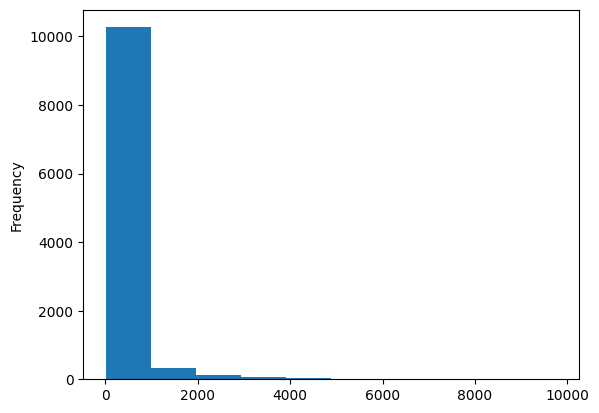

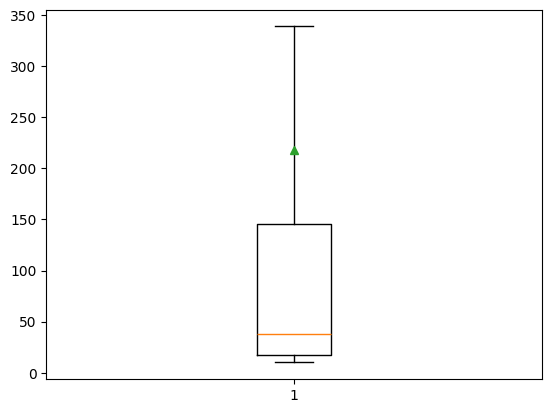

**************************************************
Variable:  popularity
Moyenne:  0.6474605913115661
Écart-type:  1.001032028763708
Médiane:  0.3845315


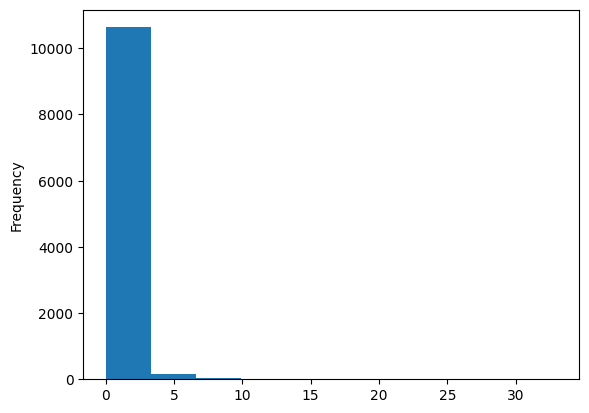

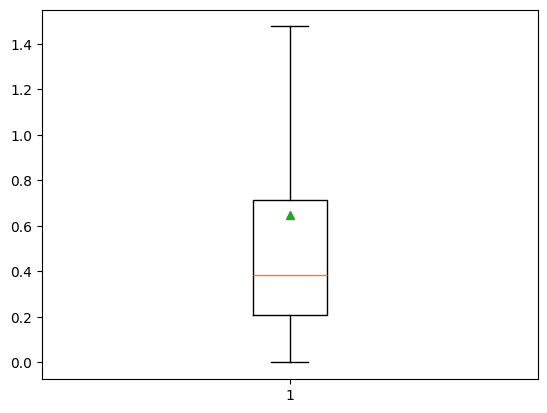

**************************************************
Variable:  budget_adj
Moyenne:  17587121.43827647
Écart-type:  34334366.973986
Médiane:  0.0


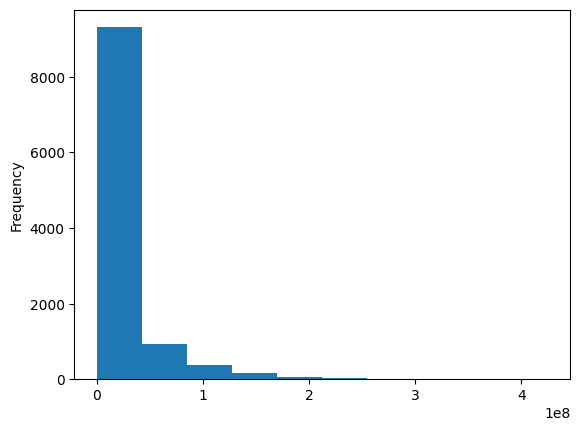

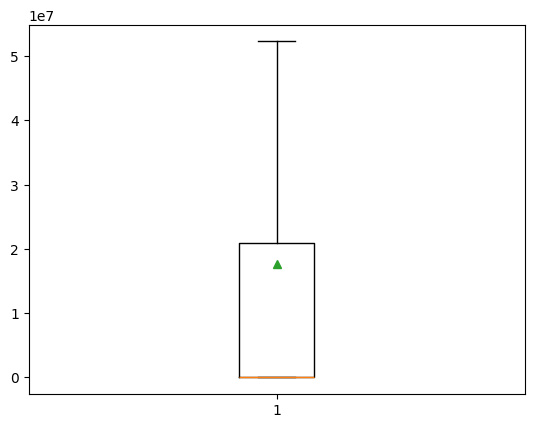

**************************************************
Variable:  revenue_adj
Moyenne:  51477974.92242079
Écart-type:  144772307.63791552
Médiane:  0.0


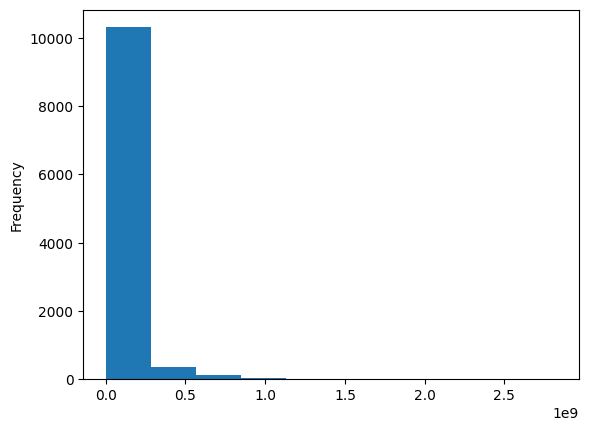

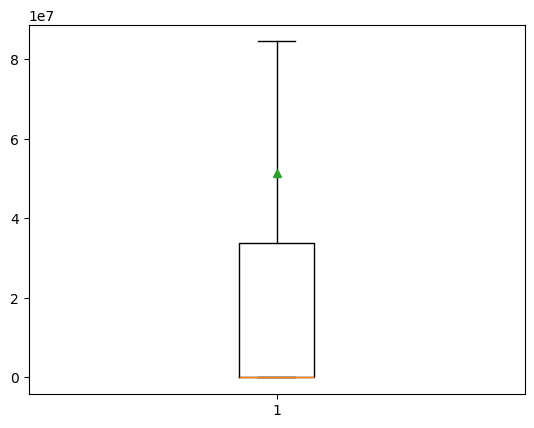

In [78]:
for x in ["vote_count", "popularity", "budget_adj", "revenue_adj"]:
    print("*"*50)
    print("Variable: ", x)
    print("Moyenne: ", data[x].mean())
    print("Écart-type: ", data[x].std())
    print("Médiane: ", data[x].median())
    data[x].plot(kind="hist")
    plt.show()
    plt.boxplot(data[x], showmeans=True, showfliers=False)
    plt.show()

Toutes ces variables ont des histogrammes similaires. Donc existe-t-il une relation entre elles ?

### Étude Bivariée

<Axes: >

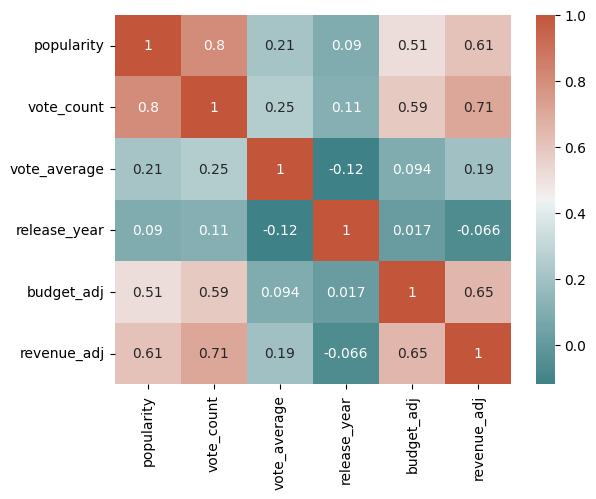

In [86]:
df = data[['popularity', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']]
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

Ici, on voit clairement l'existence d'une bonne corrélation entre les revenus et le budget, la popularité, le nombre de votes.

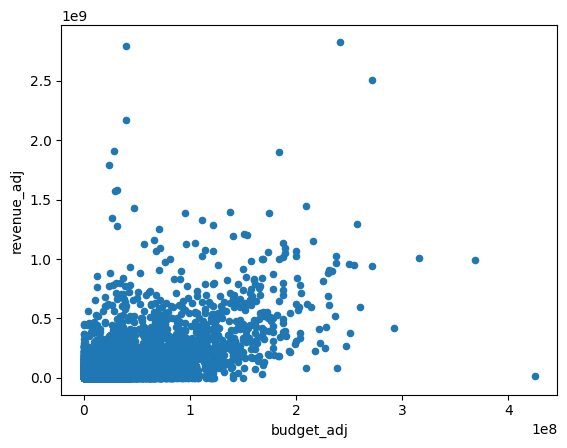

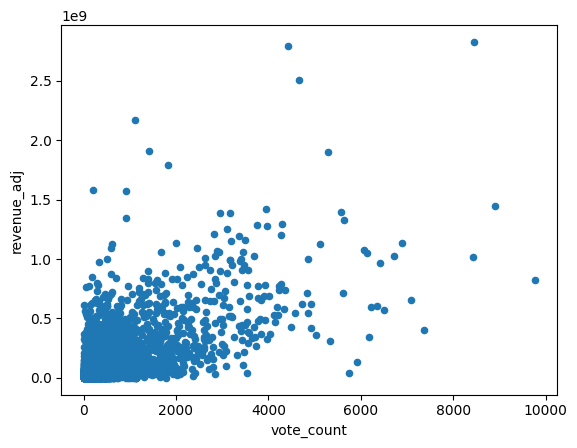

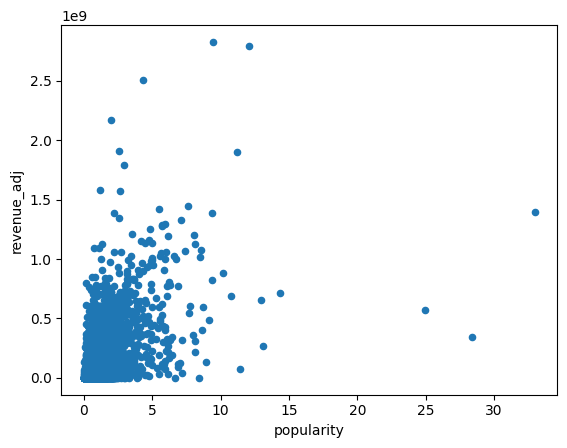

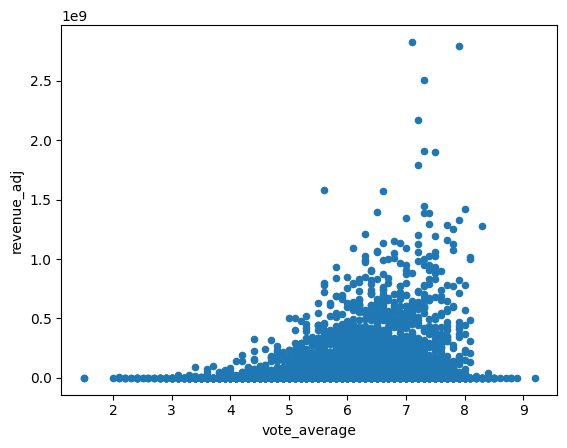

In [90]:
for x in ["budget_adj", "vote_count", "popularity", "vote_average"]:
    data.plot(kind="scatter", x=x, y="revenue_adj")
    plt.show()

Tous ces nuages de points valident bien l'existence d'une corrélation entre ces variables.